In [1]:
import numpy as np
import pandas as pd

# Importing neural network modules
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal

# Importing some machine learning modules
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Import data visualization modules
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data = pd.read_csv("Creditcard_dataset.csv")
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1     7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2    10  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3    10  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4    11  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
1 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
2  0.048456 -1.720408  ... -0.009302  0.313894  0.027740  0.500512  0.251367   
3  0.538247 -0.558895  ...  0.049924  0.238422  0.009130  0.996710 -0.767315   
4  0.115982 -0.221083  ... -0.036876  0.074412 -0.071407  0.104744  0.548265   

        V26       V27       V28  Amount  Class  
0 -0.221929  0.062723  0.061458  123.50      0  
1 -0.051634 -1.206921 -1.085339   40.80      0  
2 -0.129478  0.042850  0.016253    7.80      0  
3 -0.492208  0.042472 -0.054337    9.99      0  
4  0.104094  0.021491  0.021293   27.50      0  

[5 rows x 31 columns]



---



In [3]:
data.shape

(50492, 31)

In [4]:
data.value_counts('Class')   #or data.Class.value_counts()

Class
0    50000
1      492
Name: count, dtype: int64

###  Preprocessing and Exploration


In [5]:
data.dropna(inplace=True)
data.shape

(50492, 31)

In [6]:
data = data.drop('Time',axis = 1)
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
1 -3.807864  0.615375  1.249376  ...  1.943465 -1.015455  0.057504 -0.649709   
2  0.048456 -1.720408  1.626659  ... -0.009302  0.313894  0.027740  0.500512   
3  0.538247 -0.558895  0.309755  ...  0.049924  0.238422  0.009130  0.996710   
4  0.115982 -0.221083  0.460230  ... -0.036876  0.074412 -0.071407  0.104744   

        V25       V26       V27       V28  Amount  Class  
0  0.647376 -0.221929  0.062723  0.061458  123.50      0  
1 -0.415267 -0.051634 -1.206921 -1.085339   40.80      0  
2  0.251367 -0.129478  0.042850  0.016253    7.80      0  
3 -0.767315 -0.492208  0.042472 -0.054337    9.99      0  
4  0.548265  0.104094  0.021491  0.021293   27.50      0  

[5 rows x 30 columns]

Feature Scaling of Amount column

In [7]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
1 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
2  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152 -1.423236   
3  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027  0.470455   
4  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
1 -3.807864  0.615375  1.249376  ...  1.943465 -1.015455  0.057504 -0.649709   
2  0.048456 -1.720408  1.626659  ... -0.009302  0.313894  0.027740  0.500512   
3  0.538247 -0.558895  0.309755  ...  0.049924  0.238422  0.009130  0.996710   
4  0.115982 -0.221083  0.460230  ... -0.036876  0.074412 -0.071407  0.104744   

        V25       V26       V27       V28    Amount  Class  
0  0.647376 -0.221929  0.062723  0.061458  0.150105      0  
1 -0.415267 -0.051634 -1.206921 -1.085339 -0.199848      0  
2  0.251367 -0.129478  0.042850  0.016253 -0.339490      0  
3 -0.767315 -0.492208  0.042472 -0.054337 -0.330223      0  
4  0.548265  0.104094  0.021491  0.021293 -0.256128      0  

[5 rows x 30 columns]

Split the genuine and fraud records into separate dataframes

In [8]:
data_fraud = data[data.Class == 1]
data_genuine = data[data.Class == 0]

data_fraud

V1        V2        V3        V4        V5        V6        V7  \
50000 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545 -2.537387   
50001 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823  0.325574   
50002 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788  0.562320   
50003 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536 -3.496197   
50004  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746  1.713445   
...         ...       ...       ...       ...       ...       ...       ...   
50487 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
50488  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170   
50489 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
50490 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
50491  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695  0.223050   

             V8        V9       V10  ...       V21       V22       V23  \
50000  1.391657 -2.770089 -2.772272  ...  0.517232 -0.035049 -0.465211   
50001 -0.067794 -0.270953 -0.838587  ...  0.661696  0.435477  1.375966   
50002 -0.399147 -0.238253 -1.525412  ... -0.294166 -0.932391  0.172726   
50003 -0.248778 -0.247768 -4.801637  ...  0.573574  0.176968 -0.436207   
50004 -0.496358 -1.282858 -2.447469  ... -0.379068 -0.704181 -0.656805   
...         ...       ...       ...  ...       ...       ...       ...   
50487  0.697211 -2.064945 -5.587794  ...  0.778584 -0.319189  0.639419   
50488  0.248525 -1.127396 -3.232153  ...  0.370612  0.028234 -0.145640   
50489  1.210158 -0.652250 -3.463891  ...  0.751826  0.834108  0.190944   
50490  1.058733 -1.632333 -5.245984  ...  0.583276 -0.269209 -0.456108   
50491 -0.068384  0.577829 -0.888722  ... -0.164350 -0.295135 -0.072173   

            V24       V25       V26       V27       V28    Amount  Class  
50000  0.320198  0.044519  0.177840  0.261145 -0.143276 -0.372497      1  
50001 -0.293803  0.279798 -0.145362 -0.252773  0.035764  1.866017      1  
50002 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  0.642790      1  
50003 -0.053502  0.252405 -0.657488 -0.827136  0.849573 -0.122833      1  
50004 -1.632653  1.488901  0.566797 -0.010016  0.146793 -0.368265      1  
...         ...       ...       ...       ...       ...       ...    ...  
50487 -0.294885  0.537503  0.788395  0.292680  0.147968  1.277825      1  
50488 -0.081049  0.521875  0.739467  0.389152  0.186637 -0.369281      1  
50489  0.032070 -0.739695  0.471111  0.385107  0.194361 -0.042898      1  
50490 -0.183659 -0.328168  0.606116  0.884876 -0.253700  0.664244      1  
50491 -0.450261  0.313267 -0.289617  0.002988 -0.015309 -0.192527      1  

[492 rows x 30 columns]

Split the data into features and labels

In [9]:
X = data.drop('Class',axis = 1)
y = data['Class']

Data Exploration
  - Apply PCA to reduce the dimensionality of features `X` into two dimensions (Principal Component Analysis)
  - Scatter plot to visualize our data

In [10]:
pca = PCA(2)
transformed_data = pca.fit_transform(X)
df = pd.DataFrame(transformed_data)
df['label'] = y
df

0         1  label
0      -0.447840  1.197508      0
1      -0.582389  0.258231      0
2      -0.939390 -0.728256      0
3      -0.630766 -0.499150      0
4      -0.536286 -1.055352      0
...          ...       ...    ...
50487  10.855755 -2.787425      1
50488   6.927755 -4.949659      1
50489   7.038194 -2.785062      1
50490  11.649181 -1.991782      1
50491  -0.227984 -2.009573      1

[50492 rows x 3 columns]

Scatter plot to visualize data

In [11]:
px.scatter(df, x = 0, y = 1, color = df.label.astype(str))

<Axes: xlabel='0', ylabel='1'>

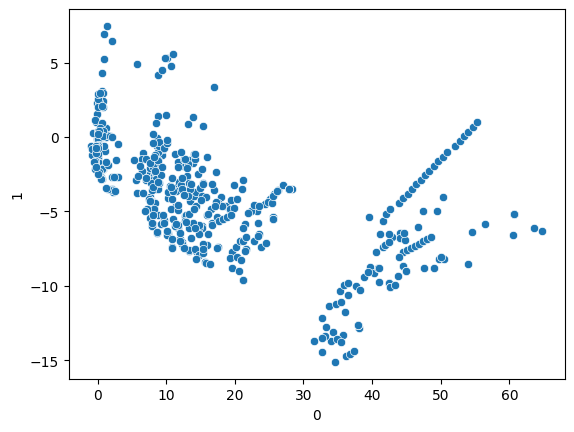

In [22]:
filtered_df = df[df['label'] == 1]
sns.scatterplot(data=filtered_df, x=0, y=1)

# # Set the x and y axis limits
# plt.xlim(-20, 60)
# plt.ylim(-20, 60)

# # Show the plot
# plt.show()

### Building the Generator Model

Generator model architecture

In [23]:
def build_generator():
  model = Sequential()

  model.add(Dense(32, activation = 'relu', input_dim = 29, kernel_initializer = 'he_uniform'))
  model.add(BatchNormalization())

  model.add(Dense(64, activation = 'relu'))
  model.add(BatchNormalization())

  model.add(Dense(128, activation = 'relu'))
  model.add(BatchNormalization())

  # model.add(Dense(64, activation = 'linear'))
  # model.add(BatchNormalization())

  model.add(Dense(29, activation = 'linear'))
  model.summary()

  return model

build_generator()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                960       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_2 (Bat  (None, 128)               5

### Building the Discriminator Model

Discriminator model architecture

In [24]:
def build_discriminator():
  model = Sequential()

  model.add(Dense(128, activation = 'relu', input_dim = 29, kernel_initializer = 'he_uniform'))

  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(16, activation = 'relu'))

  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy')
  model.summary()

  return model

build_discriminator()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3840      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 15777 (61.63 KB)
Trainable params: 15777

### Combine Generator and Discriminator models to Build The GAN

In [25]:
def build_gan(generator, discriminator):
  discriminator.trainable = False   #freeze the discriminator
  gan_input = Input(shape = (generator.input_shape[1],))
  x = generator(gan_input)

  gan_output = discriminator(x)
  gan = Model(inputs = gan_input, outputs = gan_output)
  gan.summary()

  return gan

# build_gan(build_generator(), build_discriminator())

Generates synthetic data using the Generator

In [26]:
def generate_synthetic_data(generator, num_samples):
  noise = np.random.normal(0, 1, (num_samples, generator.input_shape[1]))
  synthetic_data = generator.predict(noise)
  return synthetic_data

### Train and evaluate GAN
*    Defining some variables
*    Creating GAN
*    Training GAN
*    Monitor the GAN performance using PCA




In [27]:
def monitor_generator(generator):
    # Initialize a PCA (Principal Component Analysis) object with 2 components
    pca = PCA(n_components=2)

    # Drop the 'Class' column from the fraud dataset to get real data
    real_fraud_data = data_fraud.drop("Class", axis=1)

    # Transform the real fraud data using PCA
    transformed_data_real = pca.fit_transform(real_fraud_data.values)

    # Create a DataFrame for the transformed real data and add a 'label' column with the value 'real'
    df_real = pd.DataFrame(transformed_data_real)
    df_real['label'] = "real"

    # Generate synthetic fraud data using the provided generator and specify the number of samples (492 in this case)
    synthetic_fraud_data = generate_synthetic_data(generator, 492)

    # Transform the synthetic fraud data using PCA
    transformed_data_fake = pca.fit_transform(synthetic_fraud_data)

    # Create a DataFrame for the transformed fake data and add a 'label' column with the value 'fake'
    df_fake = pd.DataFrame(transformed_data_fake)
    df_fake['label'] = "fake"

    # Concatenate the real and fake data DataFrames
    df_combined = pd.concat([df_real, df_fake])

    # Create a scatterplot to visualize the data points, using the first and second PCA components as x and y, respectively,
    # and color points based on the 'label' column, with a size of 10
    plt.figure()
    sns.scatterplot(data=df_combined, x=0, y=1, hue='label', s=10)
    plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                960       
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_5 (Bat  (None, 128)              

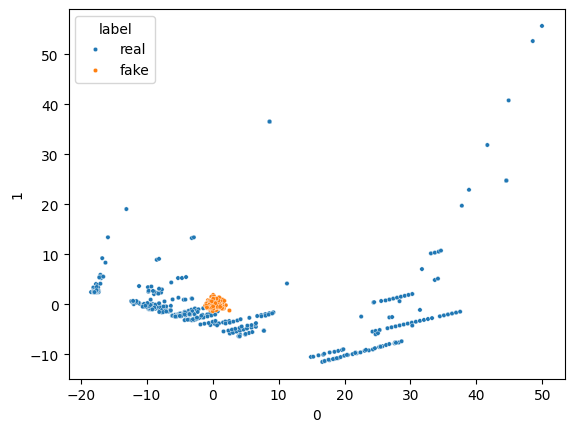

16/16 [==============================] - 0s 2ms/step


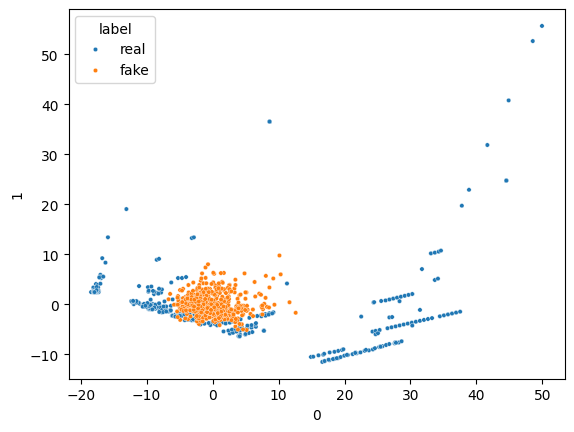

16/16 [==============================] - 0s 2ms/step


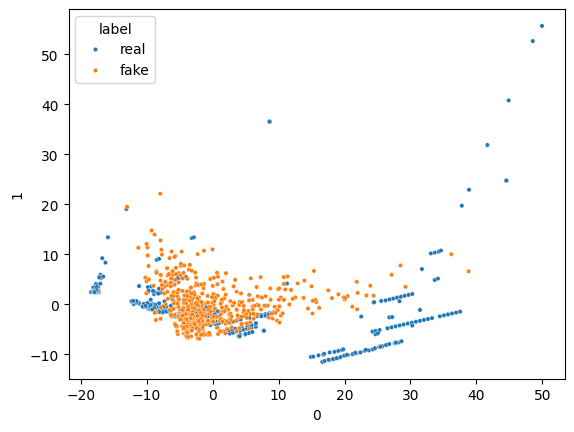

16/16 [==============================] - 0s 2ms/step


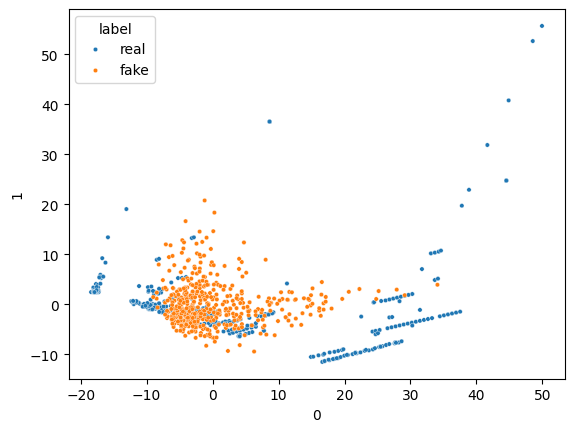

16/16 [==============================] - 0s 2ms/step


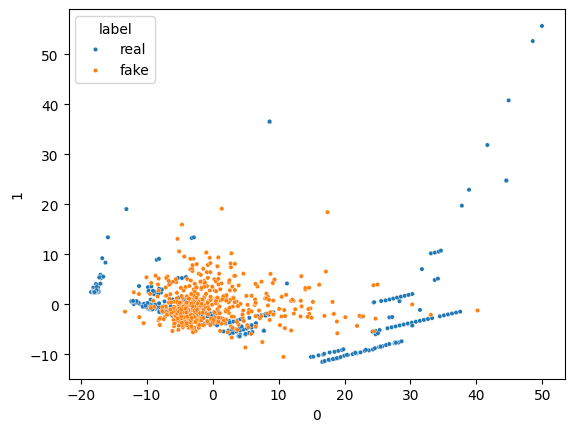

16/16 [==============================] - 0s 3ms/step


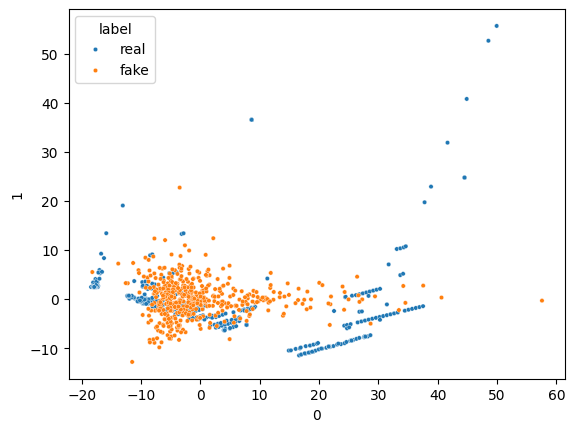

16/16 [==============================] - 0s 3ms/step


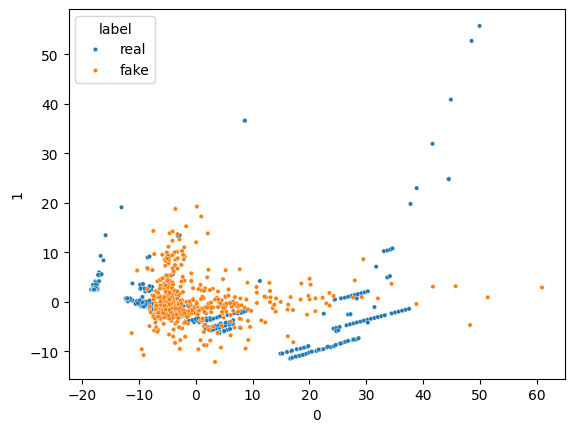

16/16 [==============================] - 0s 3ms/step


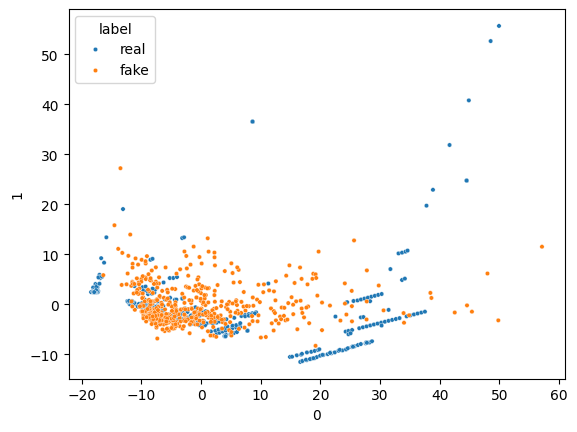

16/16 [==============================] - 0s 3ms/step


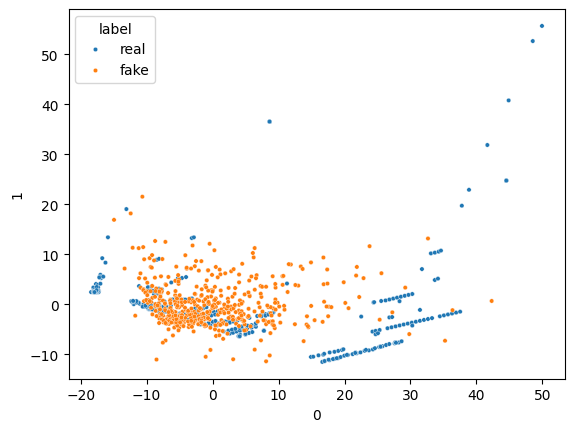

16/16 [==============================] - 0s 3ms/step


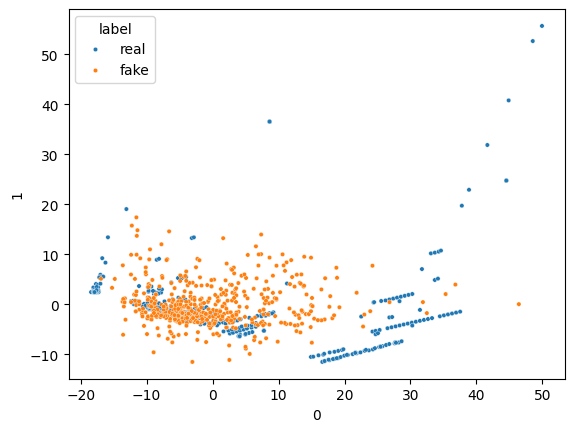

16/16 [==============================] - 0s 3ms/step


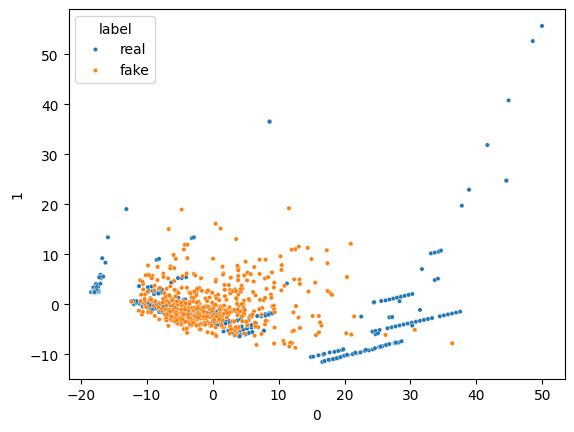

16/16 [==============================] - 0s 3ms/step


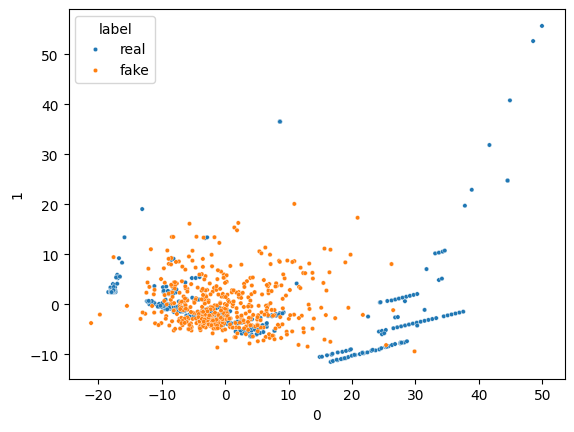

16/16 [==============================] - 0s 3ms/step


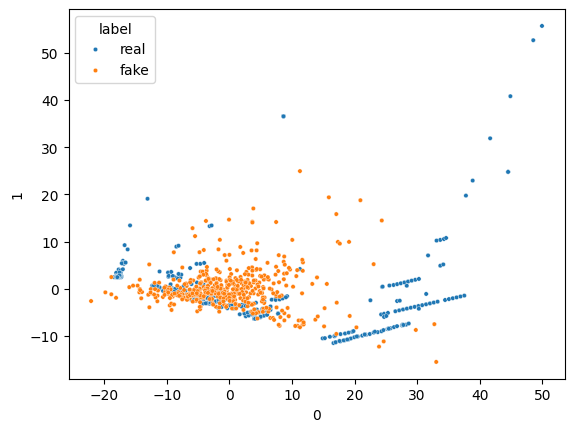

16/16 [==============================] - 0s 3ms/step


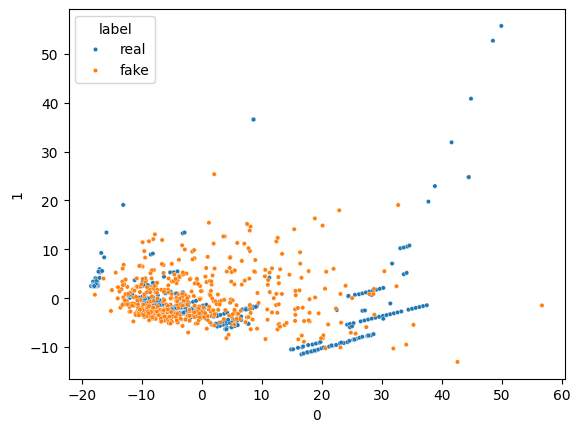

16/16 [==============================] - 0s 3ms/step


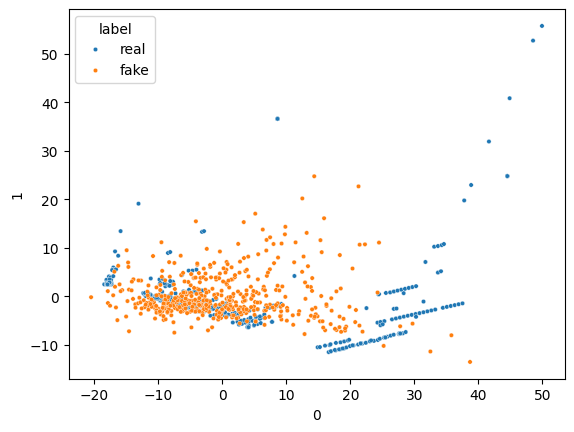

16/16 [==============================] - 0s 4ms/step


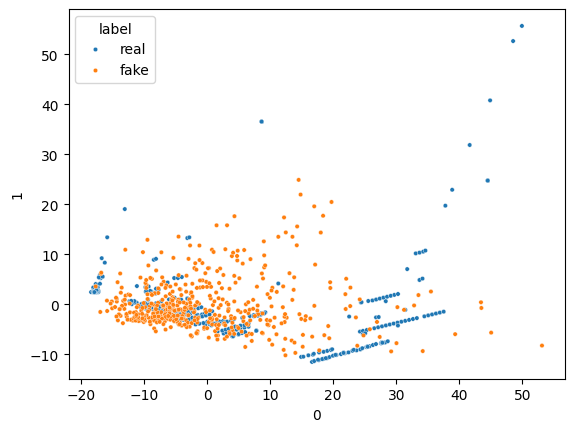

16/16 [==============================] - 0s 3ms/step


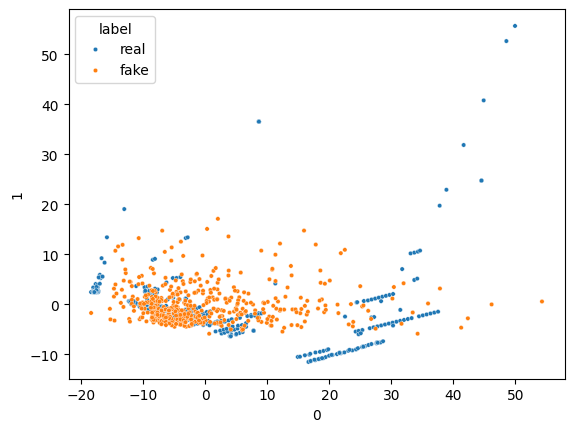

16/16 [==============================] - 0s 4ms/step


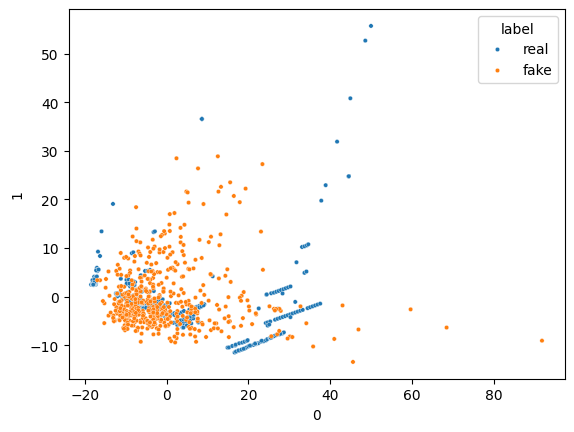

16/16 [==============================] - 0s 3ms/step


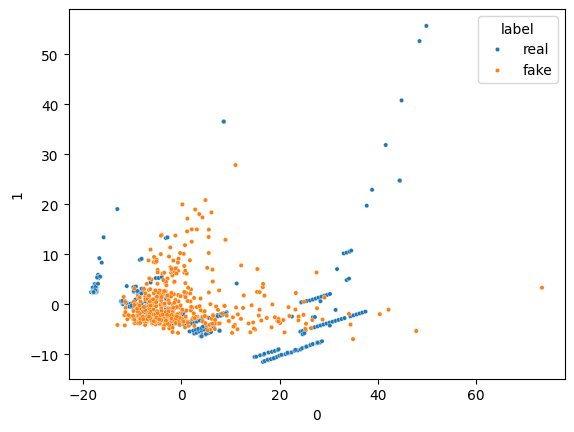

16/16 [==============================] - 0s 3ms/step


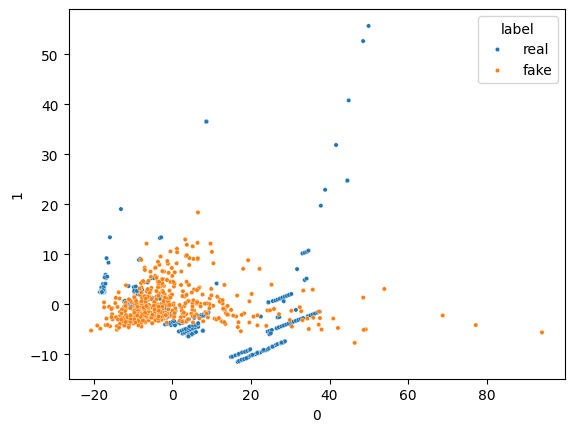

16/16 [==============================] - 0s 3ms/step


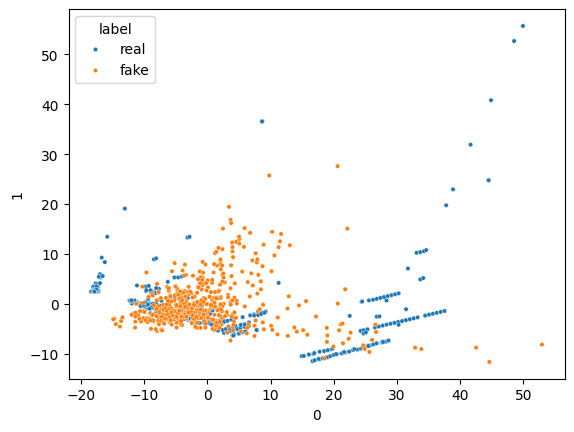

16/16 [==============================] - 0s 3ms/step


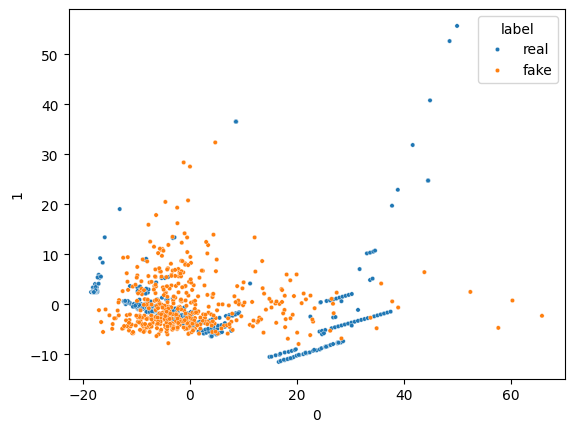

16/16 [==============================] - 0s 3ms/step


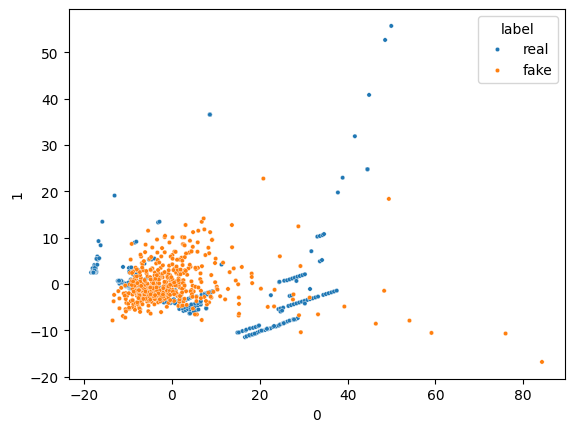

16/16 [==============================] - 0s 3ms/step


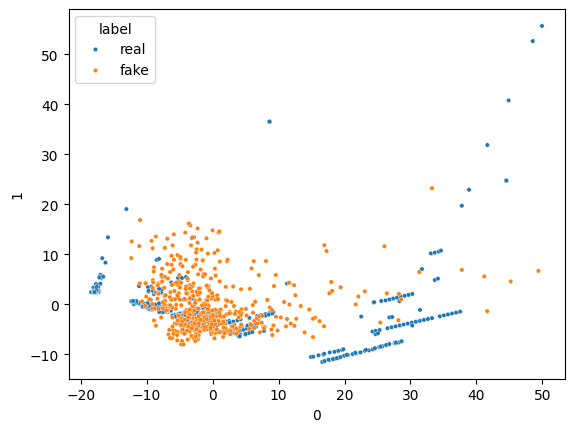

16/16 [==============================] - 0s 3ms/step


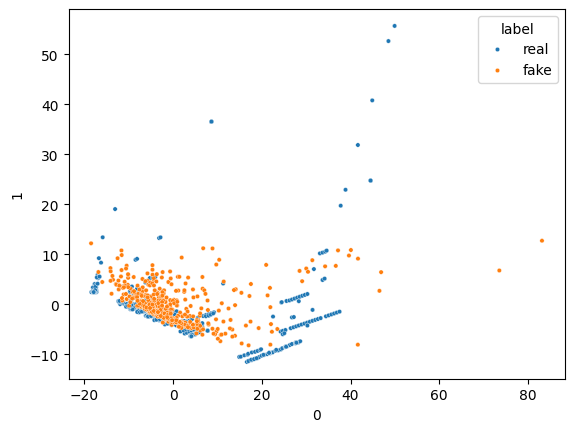

16/16 [==============================] - 0s 3ms/step


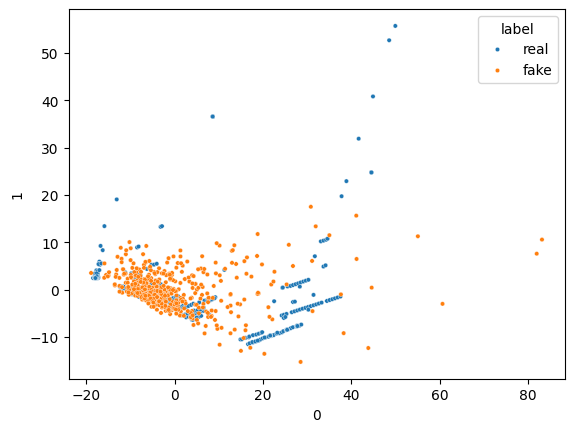

16/16 [==============================] - 0s 3ms/step


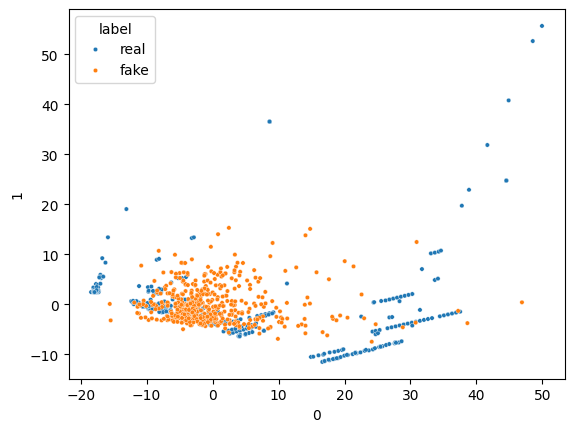

16/16 [==============================] - 0s 4ms/step


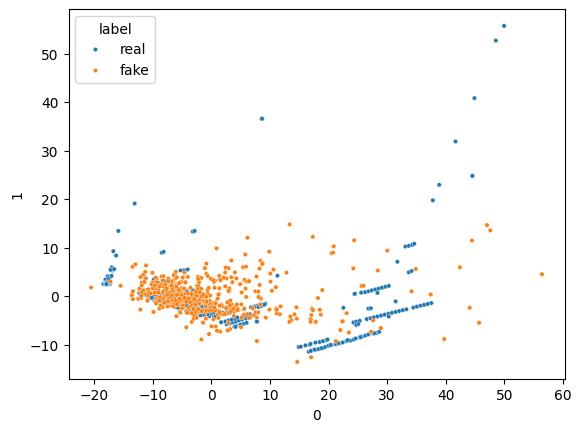

16/16 [==============================] - 0s 3ms/step


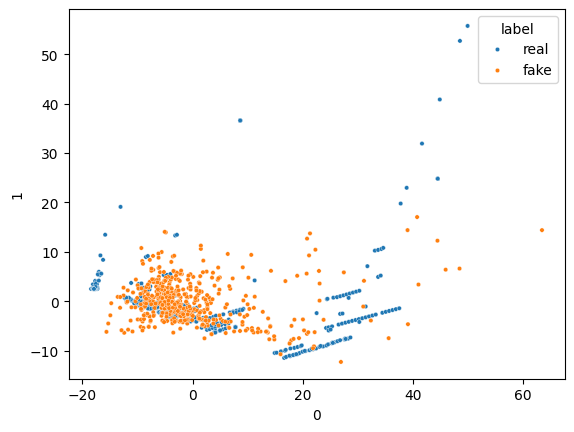

16/16 [==============================] - 0s 2ms/step


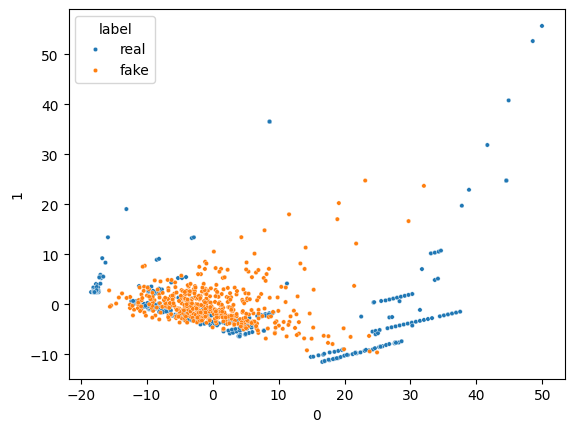

16/16 [==============================] - 0s 3ms/step


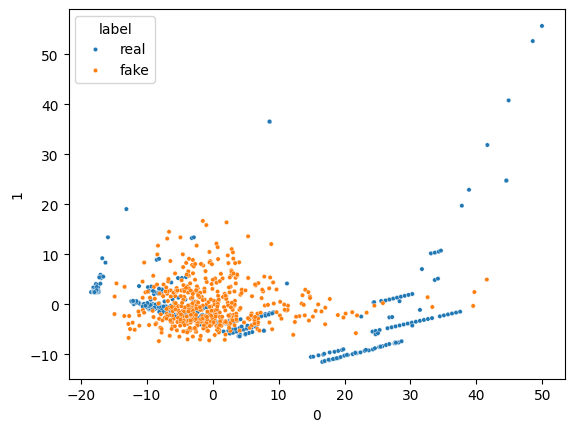

16/16 [==============================] - 0s 3ms/step


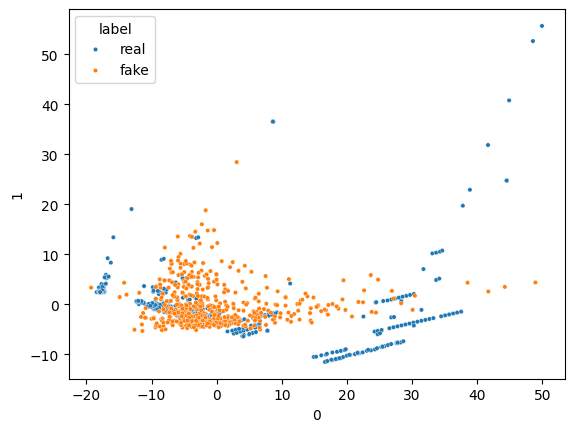

16/16 [==============================] - 0s 4ms/step


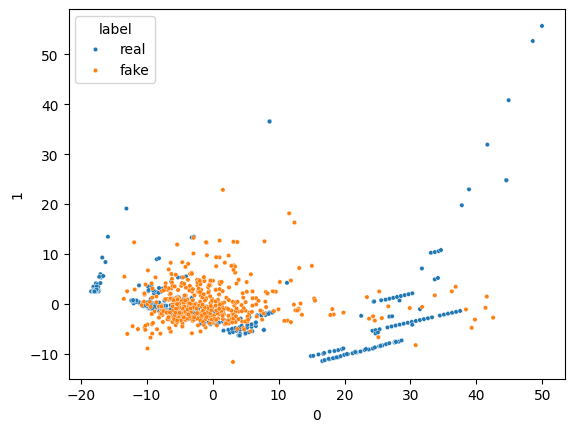

16/16 [==============================] - 0s 4ms/step


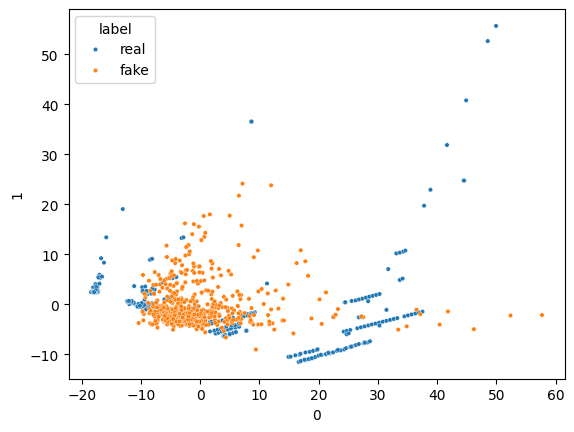

16/16 [==============================] - 0s 3ms/step


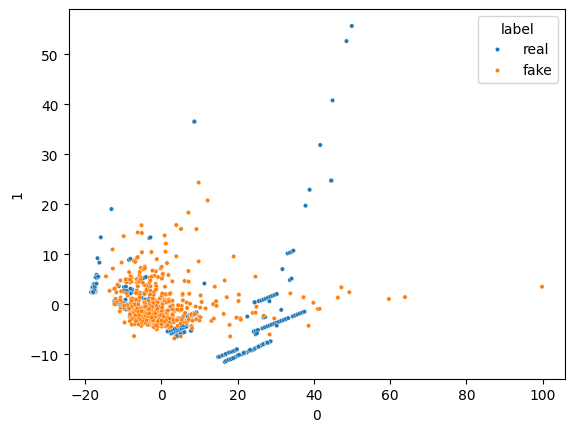

16/16 [==============================] - 0s 3ms/step


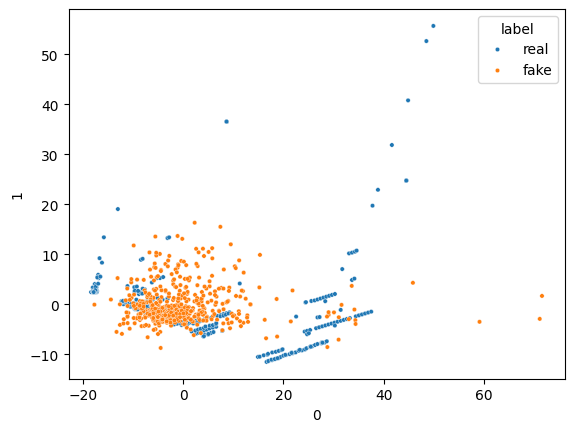

16/16 [==============================] - 0s 3ms/step


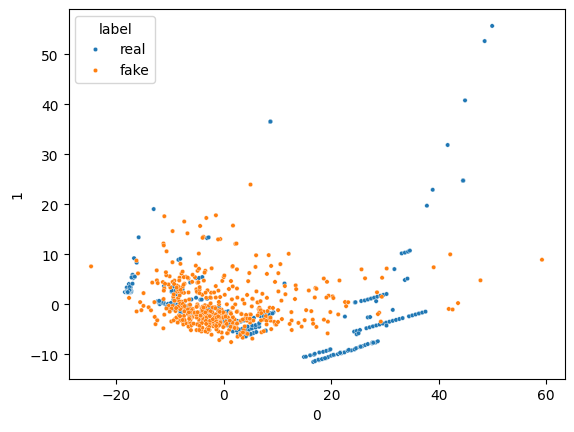

16/16 [==============================] - 0s 4ms/step


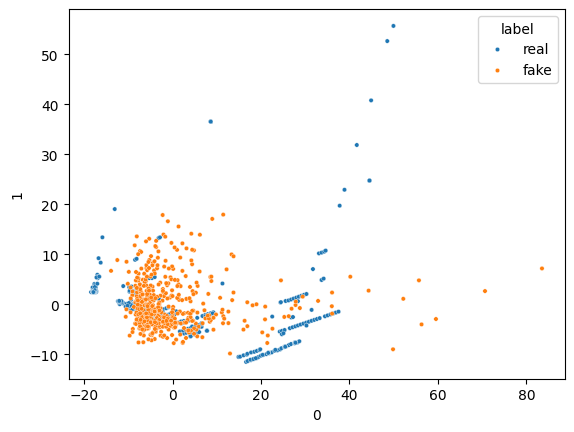

16/16 [==============================] - 0s 3ms/step


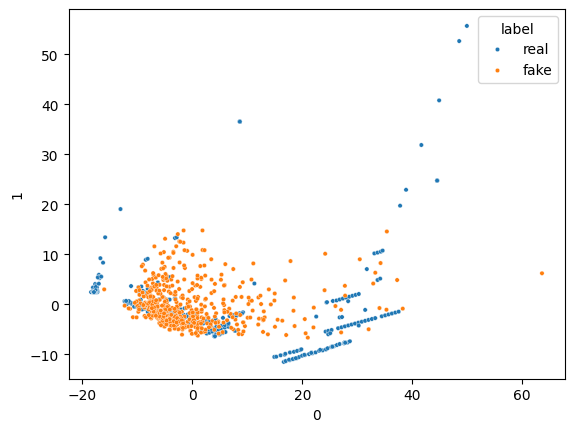

16/16 [==============================] - 0s 4ms/step


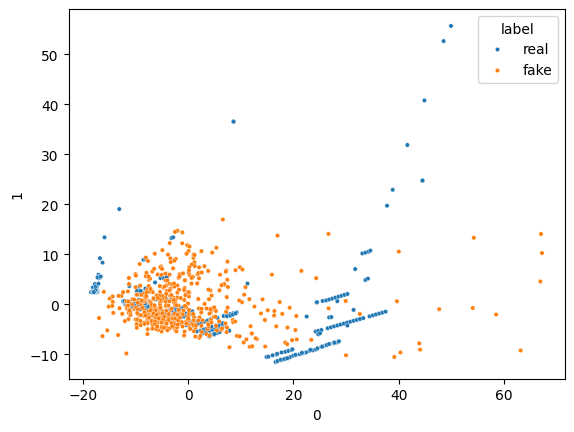

16/16 [==============================] - 0s 3ms/step


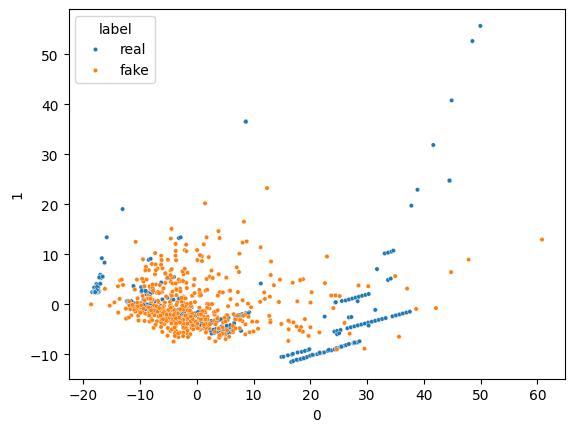

16/16 [==============================] - 0s 4ms/step


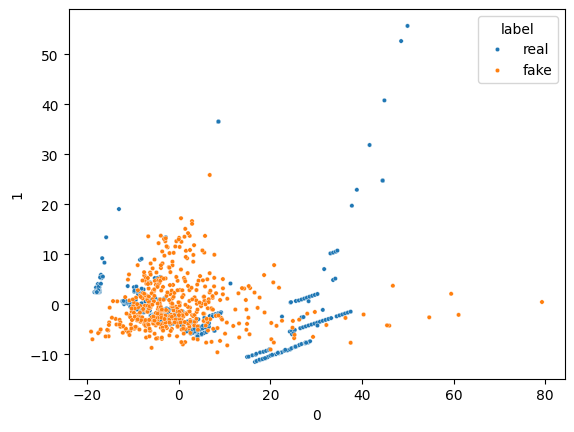

16/16 [==============================] - 0s 4ms/step


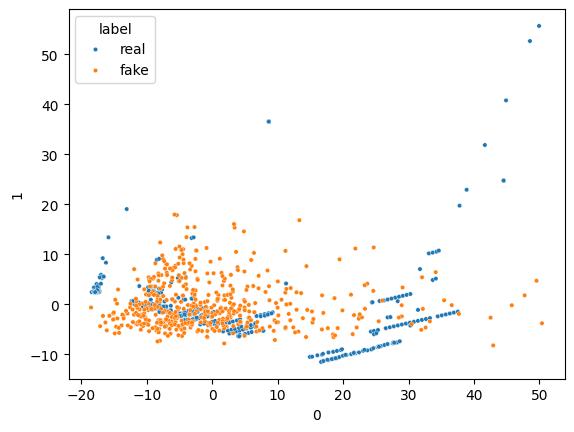

16/16 [==============================] - 0s 3ms/step


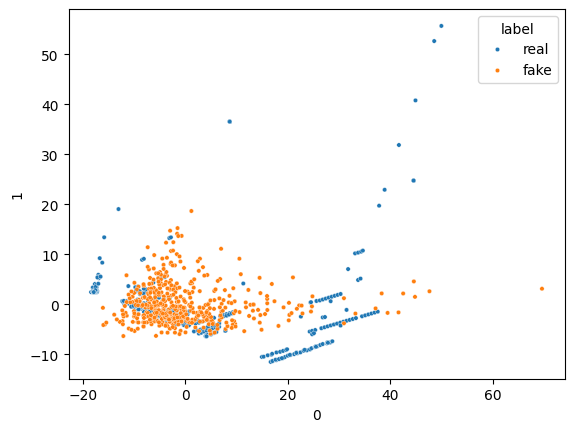

16/16 [==============================] - 0s 3ms/step


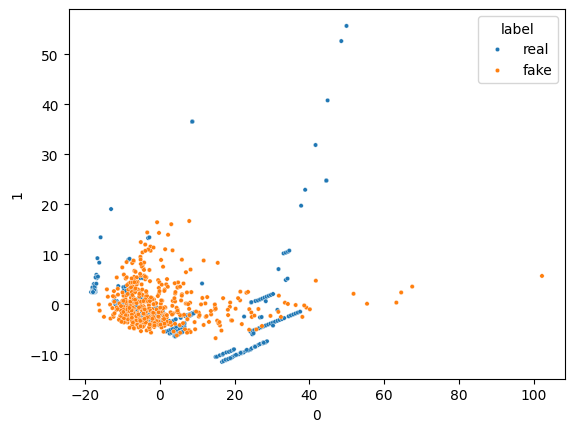

16/16 [==============================] - 0s 3ms/step


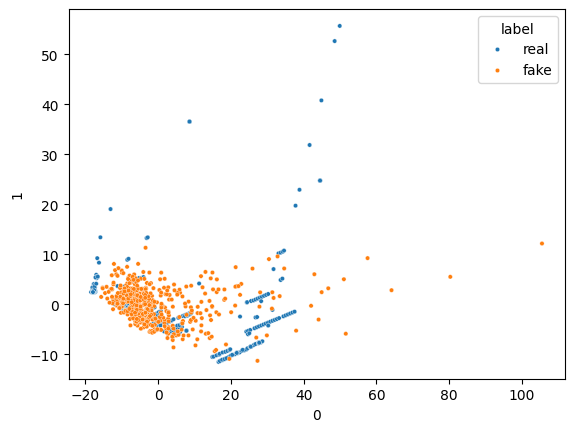

16/16 [==============================] - 0s 3ms/step


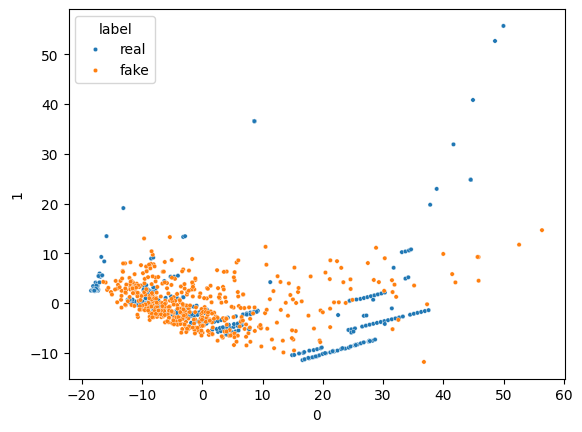

16/16 [==============================] - 0s 4ms/step


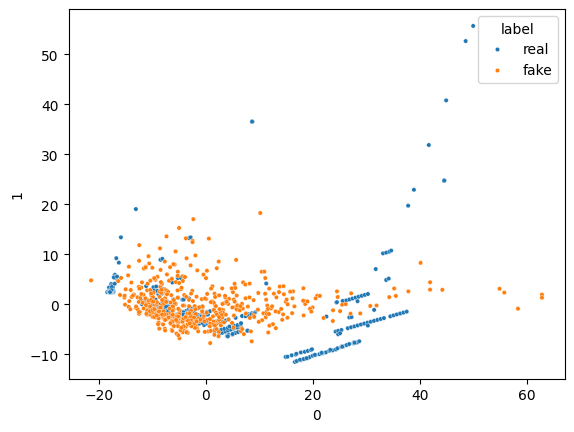

16/16 [==============================] - 0s 4ms/step


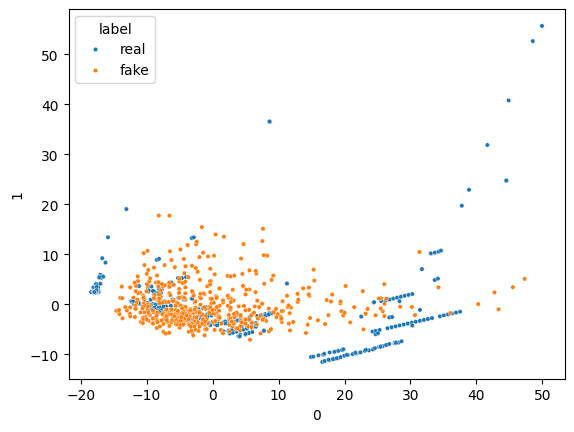

16/16 [==============================] - 0s 4ms/step


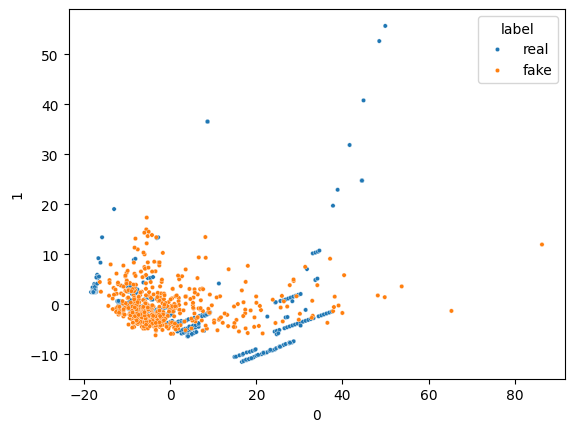

1/1 [==============================] - 0s 17ms/step


In [28]:
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)
gan.compile(optimizer = 'adam', loss = 'binary_crossentropy')

num_epochs = 5000
batch_size = 64
half_batch = int(batch_size / 2)

for epoch in range(num_epochs):
  X_fake = generate_synthetic_data(generator, half_batch)
  y_fake = np.zeros((half_batch, 1))

  X_real = data_fraud.drop(columns = ['Class']).sample(half_batch)
  y_real = np.ones((half_batch, 1))

  discriminator.trainable = True
  discriminator.train_on_batch(X_real, y_real)
  discriminator.train_on_batch(X_fake, y_fake)

  noise = np.random.normal(0, 1, (batch_size, 29))
  gan.train_on_batch(noise, np.ones((batch_size, 1)))

  if epoch % 100 == 0:
    monitor_generator(generator)

### Task 7 - Generate synthetic data using the trained Generator

*   Generate 1000 fradulent data points using the trained generator
*   Compare the distribution of `real` and `synthetic` fradulent data points.


In [29]:
synthetic_data = generate_synthetic_data(generator, 1000)
df = pd.DataFrame(synthetic_data)
df['label'] = 'synthetic'

df2 = data_fraud.drop('Class', axis = 1)
df2['label'] = 'real'
df2.columns = df.columns

combined_df = pd.concat([df, df2])
combined_df

32/32 [==============================] - 0s 2ms/step


0         1          2         3         4         5         6  \
0     -0.752312  1.335055  -0.176995  2.122977  0.406298  0.065744 -1.039077   
1     -3.609299  4.599231  -3.206129  5.698940 -2.369461 -1.095486 -4.344978   
2     -3.040384  2.668949  -6.561684  3.116763 -4.050682 -1.932624 -5.986528   
3     -3.864498  6.770368 -10.238285  7.897702 -4.193877 -2.810642 -8.664208   
4     -2.498803  5.809363  -8.198468  6.866408 -3.606259 -2.839828 -7.310517   
...         ...       ...        ...       ...       ...       ...       ...   
50487 -1.927883  1.125653  -4.518331  1.749293 -1.566487 -2.010494 -0.882850   
50488  1.378559  1.289381  -5.004247  1.411850  0.442581 -1.326536 -1.413170   
50489 -0.676143  1.126366  -2.213700  0.468308 -1.120541 -0.003346 -2.234739   
50490 -3.113832  0.585864  -5.399730  1.817092 -0.840618 -2.943548 -2.208002   
50491  1.991976  0.158476  -2.583441  0.408670  1.151147 -0.096695  0.223050   

              7         8          9  ...        20        21        22  \
0      0.359136 -1.543240  -1.628598  ...  0.357806  0.263702 -0.485581   
1      0.384948 -3.111631  -4.414885  ...  3.347553 -1.330481 -0.646188   
2      2.029585 -3.286703  -7.206730  ...  1.533429  0.601946  0.092683   
3      4.170524 -4.570764 -10.379455  ...  2.209391 -0.018501 -0.173905   
4      3.547337 -3.033324  -8.304126  ...  2.278883  0.364112 -0.199150   
...         ...       ...        ...  ...       ...       ...       ...   
50487  0.697211 -2.064945  -5.587794  ...  0.778584 -0.319189  0.639419   
50488  0.248525 -1.127396  -3.232153  ...  0.370612  0.028234 -0.145640   
50489  1.210158 -0.652250  -3.463891  ...  0.751826  0.834108  0.190944   
50490  1.058733 -1.632333  -5.245984  ...  0.583276 -0.269209 -0.456108   
50491 -0.068384  0.577829  -0.888722  ... -0.164350 -0.295135 -0.072173   

             23        24        25        26        27        28      label  
0     -0.512375  0.376523 -0.081149  0.340008 -0.175379 -0.174091  synthetic  
1      0.315333 -0.517151 -0.325885  0.105825 -0.728531 -0.488259  synthetic  
2     -0.050094 -0.444886  0.530650  1.148942  0.362392  0.080071  synthetic  
3     -0.668388 -0.198954  1.239827  0.610518  0.182457 -0.455519  synthetic  
4     -0.494129 -0.581836  0.965160  0.439018 -0.007172 -0.386690  synthetic  
...         ...       ...       ...       ...       ...       ...        ...  
50487 -0.294885  0.537503  0.788395  0.292680  0.147968  1.277825       real  
50488 -0.081049  0.521875  0.739467  0.389152  0.186637 -0.369281       real  
50489  0.032070 -0.739695  0.471111  0.385107  0.194361 -0.042898       real  
50490 -0.183659 -0.328168  0.606116  0.884876 -0.253700  0.664244       real  
50491 -0.450261  0.313267 -0.289617  0.002988 -0.015309 -0.192527       real  

[1492 rows x 30 columns]

The individual feature distribution of `synthetic` and `real` fraud data.

In [30]:
for col in combined_df.columns:
  plt.figure()
  fig = px.histogram(combined_df, color = 'label', x=col,barmode="overlay", title = f'Feature {col}', width = 640, height = 500)
  fig.show()

<ipython-input-30-7712b9dc83b8>:2: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>